In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pygris
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

from epymorph.data import geo_library, ipm_library, mm_library
from epymorph.initializer import bird_movement_initializer
from epymorph.engine.standard_sim import StandardSimulation
from epymorph.simulation import TimeFrame

In [2]:
from epymorph.util import pairwise_haversine

geo = geo_library['maricopa_cbg_2019']()

distance = pairwise_haversine(geo.values['centroid']['longitude'], geo.values['centroid']['latitude'])


In [3]:

from epymorph.util import weibull_distribution_prob


probabilities = weibull_distribution_prob(distance,3,3)


[[0.00000000e+000 2.76876100e-001 6.20841416e-005 ... 1.10759309e-192
  1.10961975e-111 0.00000000e+000]
 [2.76876100e-001 0.00000000e+000 3.25790283e-001 ... 3.61042290e-173
  4.91608138e-095 0.00000000e+000]
 [6.20841416e-005 3.25790283e-001 0.00000000e+000 ... 4.11419029e-184
  5.89276793e-101 4.25313577e-315]
 ...
 [1.10759309e-192 3.61042290e-173 4.11419029e-184 ... 0.00000000e+000
  1.48188714e-001 5.52671296e-080]
 [1.10961975e-111 4.91608138e-095 5.89276793e-101 ... 1.48188714e-001
  0.00000000e+000 1.66480720e-078]
 [0.00000000e+000 0.00000000e+000 4.25313577e-315 ... 5.52671296e-080
  1.66480720e-078 0.00000000e+000]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


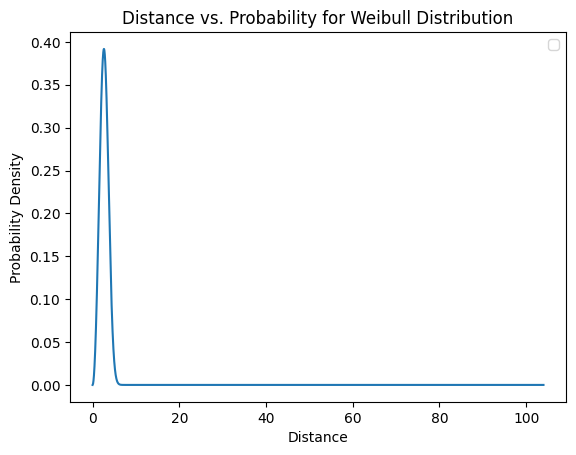

In [4]:
import matplotlib.pyplot as plt
flat_distances = distance.flatten()
flat_probabilities = probabilities.flatten()
sorted_indices = np.argsort(flat_distances)
sorted_distances = flat_distances[sorted_indices]
sorted_probabilities = flat_probabilities[sorted_indices]
plt.plot(sorted_distances,sorted_probabilities)
plt.title('Distance vs. Probability for Weibull Distribution')
plt.xlabel('Distance')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


In [5]:

from epymorph.util import powerlaw_distribution_probability, weibull_distribution_prob


powerlaw_probabilities = powerlaw_distribution_probability(distance,3.3)


c:\Users\sp2665\Downloads\Sindhu\Research EpyMoRPH\Epymorph\epymorph\util.py:183: RuntimeWarning: divide by zero encountered in power
  ((normalize_distance / min_distance)**-alpha)  # type: ignore


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


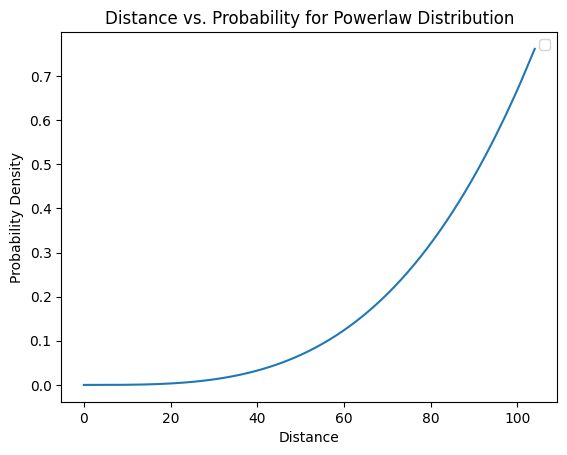

In [6]:
import matplotlib.pyplot as plt
flat_powerlaw_probabilities = (1/powerlaw_probabilities).flatten()
sorted_powerlaw_probabilities = flat_powerlaw_probabilities[sorted_indices]
plt.plot(sorted_distances,sorted_powerlaw_probabilities)
plt.title('Distance vs. Probability for Powerlaw Distribution')
plt.xlabel('Distance')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


In [7]:

from epymorph.util import mosquito_movement_probability, powerlaw_distribution_probability, weibull_distribution_prob


mosquito_probabilities = mosquito_movement_probability(distance,22530)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


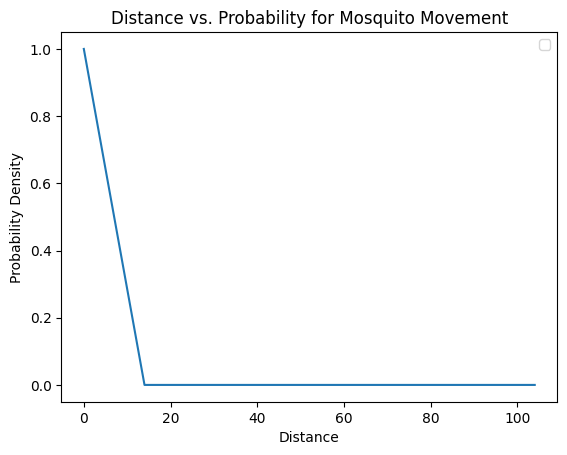

In [8]:
import matplotlib.pyplot as plt
flat_mosquito_probabilities = mosquito_probabilities.flatten()
sorted_flat_mosquito_probabilities = flat_mosquito_probabilities[sorted_indices]
plt.plot(sorted_distances,sorted_flat_mosquito_probabilities)
plt.title('Distance vs. Probability for Mosquito Movement')
plt.xlabel('Distance')
plt.ylabel('Probability Density')
plt.legend()
plt.show()
